# Part II - Ford GoBike System Analysis
## by Julian Ortiz

## Investigation Overview


The goal of this presentation is to highlight the major insights found during the exploratory analysis of the Ford GoBike (Bay Wheels) February 2019 dataset. The analysis focuses on trip durations, time-of-day usage, and behavioral differences between Subscribers and Customers.

### **Executive Summary – Key Insights**
- Trip durations are highly right-skewed, with most rides under 20 minutes.
- Subscribers show sharp weekday commute peaks (8 AM and 5 PM).
- Customers take significantly longer and more variable trips, especially on weekends.
- Weekend midday and late-night hours are associated with the longest rides.
- The strongest explanation of trip duration comes from combining:
  **user type + day of week + hour of day**.


## Dataset Overview and Executive Summary

This dataset contains all Ford GoBike trips for February 2019. Each record includes timestamps, station information, user type, demographics, and bike IDs. After data cleaning and feature engineering (performed in Part I), the dataset supports detailed temporal and behavioral analysis.

### **Key Findings Supported by Visualizations**
1. Trip durations are short for most users but extremely long for a small minority.
2. Subscribers use the system for weekday commuting.
3. Customers ride for leisure and take much longer trips.
4. Late-night usage is minimal for both groups

The three visualizations below summarize these findings.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings
import warnings
warnings.simplefilter("ignore")

# load dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')

# basic cleaning used in Part I
df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce')
df['end_time']   = pd.to_datetime(df['end_time'], errors='coerce')

# ensure duration exists
df['duration_sec'] = pd.to_numeric(df['duration_sec'], errors='coerce')

# engineer time fields
df['start_hour']   = df['start_time'].dt.hour
df['day_of_week']  = df['start_time'].dt.day_name()

# add a trimmed duration for cleaner visuals
df_trim = df[df['duration_sec'] <= 3600]


## Visualization 1 — Trip Duration Distribution

This histogram shows how trip durations are distributed, trimmed at one hour to remove extreme outliers. The resulting distribution is strongly right-skewed: most rides fall under 1,000 seconds (≈17 minutes). This supports the finding that the Bay Wheels system is used primarily for short urban transportation.


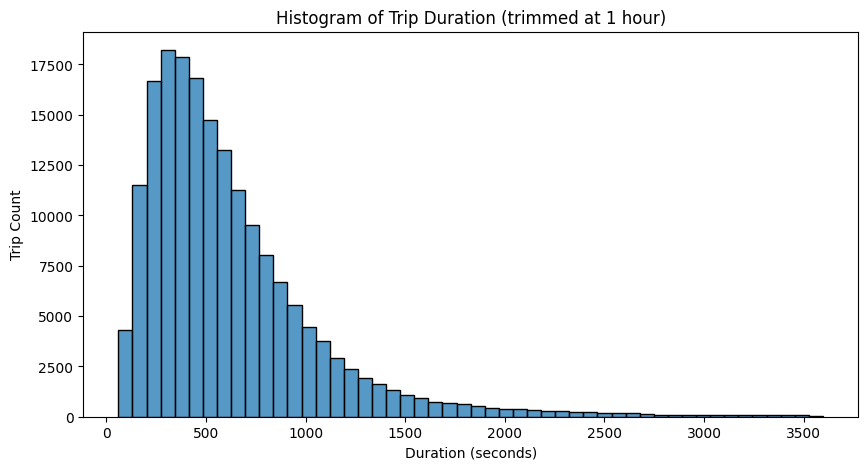

In [2]:
plt.figure(figsize=(10,5))
sns.histplot(df_trim['duration_sec'], bins=50)
plt.title('Histogram of Trip Duration (trimmed at 1 hour)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Trip Count')
plt.show()


## Visualization 2 — Trip Duration by User Type

This boxplot compares Subscribers and Customers. Subscribers have short, consistent trip durations with low variability, while Customers take longer and more variable trips. This highlights the behavioral difference between commute-driven riders (Subscribers) and leisure/tourism-driven riders (Customers).


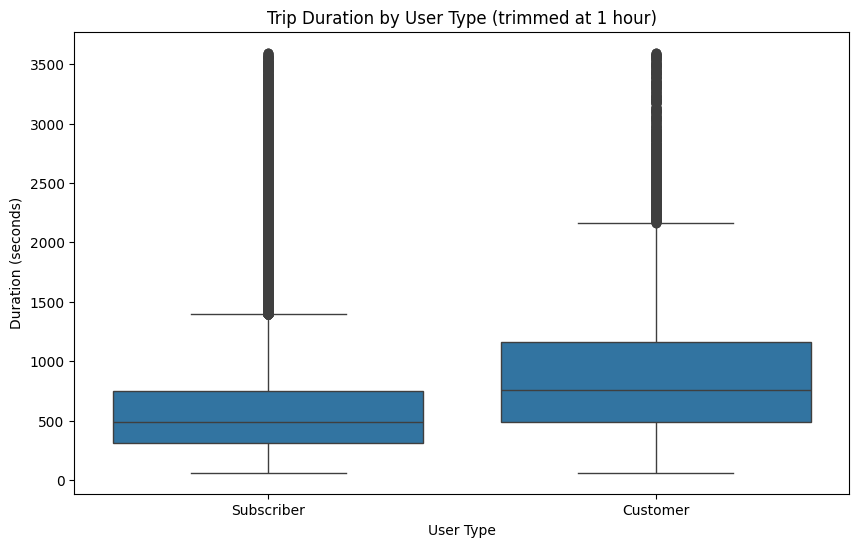

In [3]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_trim, x='user_type', y='duration_sec')
plt.title('Trip Duration by User Type (trimmed at 1 hour)')
plt.xlabel('User Type')
plt.ylabel('Duration (seconds)')
plt.show()


## Visualization 3 — Hourly distribution by user type

In summary, the hourly distribution of trips reveals distinct usage patterns between user types. Subscribers follow a structured commute-driven pattern, while Customers tend to ride more flexibly and throughout the day. Both user types show very low trip counts between 12 AM and 5 AM, indicating that the system sees limited overnight demand. These findings provide valuable context for operational planning, marketing strategies, and resource allocation within the bike-sharing system

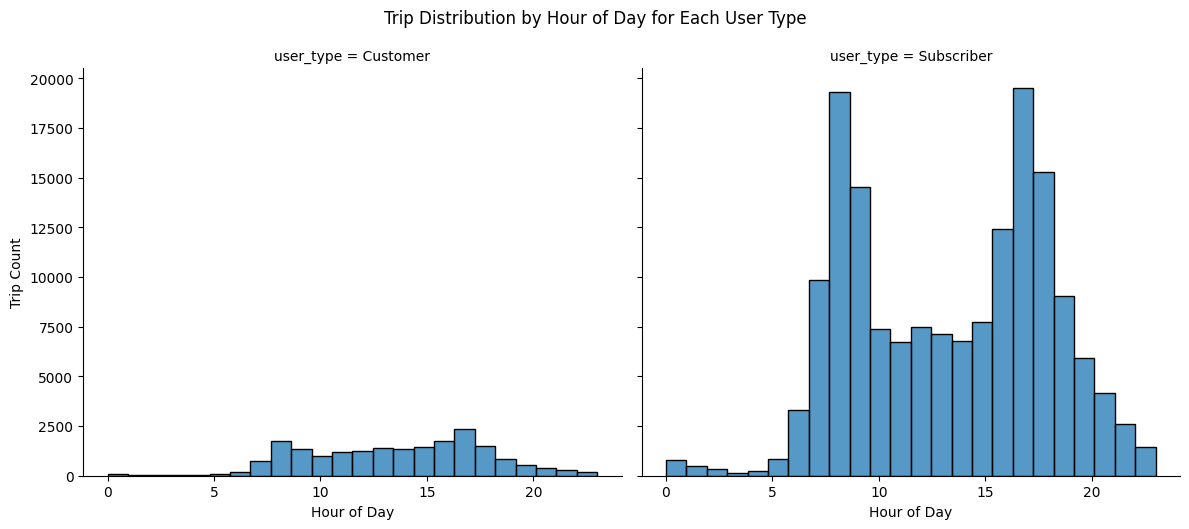

In [5]:
def facet_hour_by_usertype(data):
    g = sns.FacetGrid(data, col='user_type', height=5, aspect=1.2)
    g.map(sns.histplot, 'start_hour', bins=24)
    g.set_axis_labels('Hour of Day', 'Trip Count')
    g.fig.suptitle('Trip Distribution by Hour of Day for Each User Type', y=1.05)
    plt.show()


facet_hour_by_usertype(df)